In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization
from tensorflow.keras import utils, optimizers

Делим наш датасет на обучающую и тестовую выборку

In [9]:
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

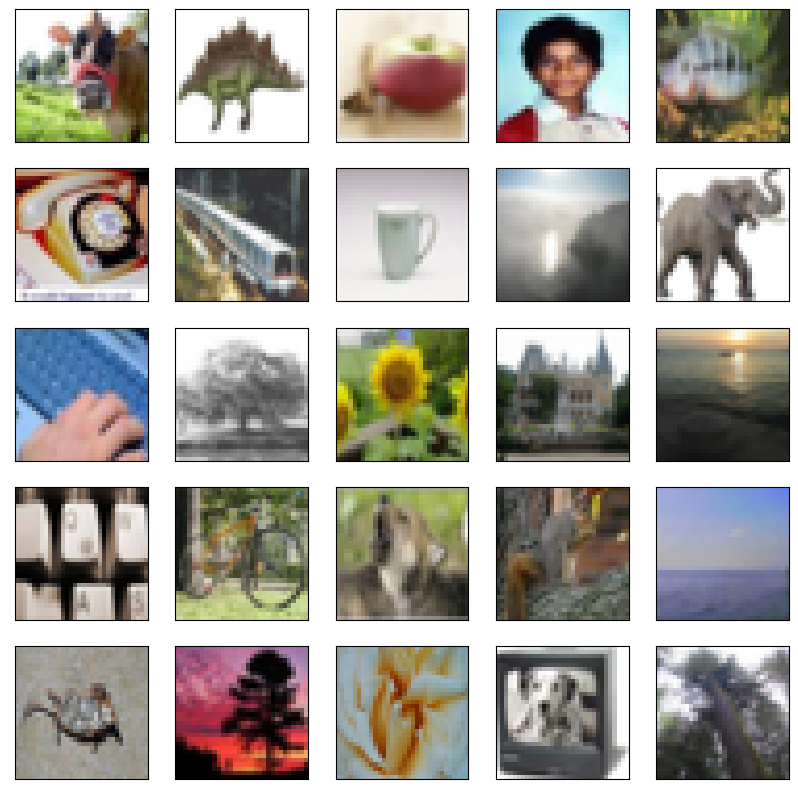

In [10]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

In [11]:
print('train_images: ', train_images.shape)
print('test_images: ', test_images.shape)
print('train_labels: ', train_labels.shape)
print('test_labels: ', test_labels.shape)

train_images:  (50000, 32, 32, 3)
test_images:  (10000, 32, 32, 3)
train_labels:  (50000, 1)
test_labels:  (10000, 1)


Нормализация данных

In [12]:
train_labels = utils.to_categorical(train_labels, 100)
test_labels = utils.to_categorical(test_labels, 100)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images = train_images / 255
test_images = test_images / 255

In [13]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

создание модели нейронной сети

In [14]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(100, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

Компиляция модели

In [15]:
model.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Обучение модели

In [16]:
epochs = 50
batch_size = 64

hist = model.fit(train_images, train_labels, batch_size=batch_size, validation_data=(test_images, test_labels),
                 epochs=epochs)

Epoch 1/60
782/782 [==============================] - 6s 4ms/step - loss: 4.0819 - accuracy: 0.0741 - val_loss: 3.6632 - val_accuracy: 0.1364
Epoch 2/60
782/782 [==============================] - 2s 3ms/step - loss: 3.4508 - accuracy: 0.1743 - val_loss: 3.2852 - val_accuracy: 0.2095
Epoch 3/60
782/782 [==============================] - 2s 3ms/step - loss: 3.1624 - accuracy: 0.2279 - val_loss: 3.0965 - val_accuracy: 0.2383
Epoch 4/60
782/782 [==============================] - 2s 3ms/step - loss: 2.9881 - accuracy: 0.2574 - val_loss: 2.9972 - val_accuracy: 0.2602
Epoch 5/60
782/782 [==============================] - 2s 3ms/step - loss: 2.8559 - accuracy: 0.2851 - val_loss: 2.8813 - val_accuracy: 0.2791
Epoch 6/60
782/782 [==============================] - 3s 3ms/step - loss: 2.7469 - accuracy: 0.3068 - val_loss: 2.8122 - val_accuracy: 0.3014
Epoch 7/60
782/782 [==============================] - 2s 3ms/step - loss: 2.6583 - accuracy: 0.3263 - val_loss: 2.8033 - val_accuracy: 0.3027
Epoch 

Проверка точности предсказания

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 2.8809 - accuracy: 0.3642


Графики

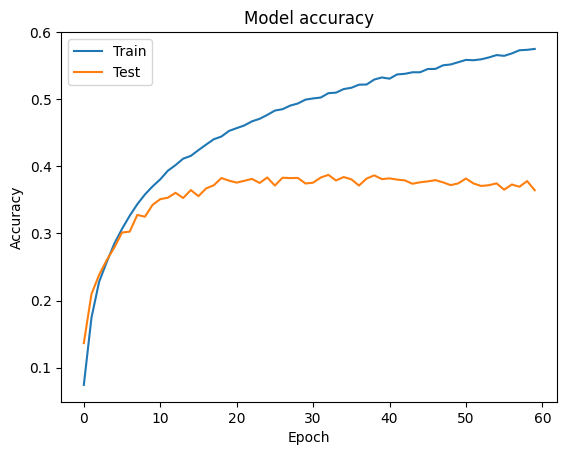

In [18]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

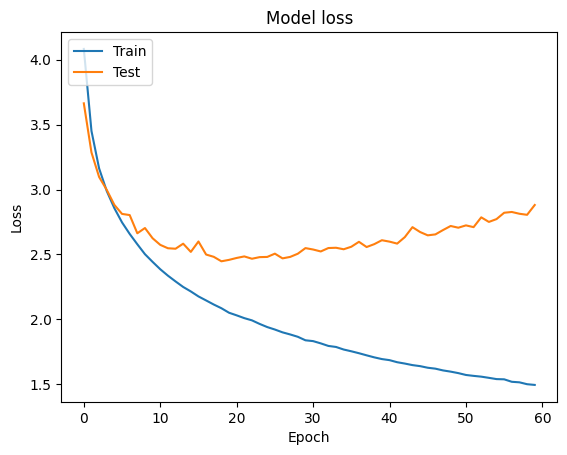

None


In [19]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
print(plt.show())